***BlueSky Airlines Case***

Python packages for simulation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

**Question 1**

This question asks for a deterministic function, so we can simply describe it in a markdown cell. Given the demand for FF, $D_{F}$, and the demand for SS, $D_S$, the revenue with a SS booking limit equal to 120 is

R = 350 * min(D_s, 120) + 850 * min(D_f, 200 - min(D_s, 120))



**Question 2**

Creating our baseline simulation

In [40]:
# set the number of simulations, numRep
numRep = 20000

# define two fare types, SS and FF
fareType = ['SS', 'FF']

# define mean and standard deviations dictionaries for the two fare types: 130 and 45 for SS, 55 and 20 for FF
mean = {'SS': 130, 'FF': 55}
stdev = {'SS': 45, 'FF': 20}

# define prices for the two fare types: 350 for SS, 850 for FF
price = {'SS': 350, 'FF': 850}

# define the booking limit for SS, 120
bookLimitSS = 120

# define the plane capacity, 200
planeCapacity = 200

# set the seed to be 7
np.random.seed(7)


In [41]:
revenues = np.zeros(numRep)
prob_empty = 0

for rep in range(numRep):
    D_s = np.random.normal(mean['SS'], stdev['SS'])
    D_f = np.random.normal(mean['FF'], stdev['FF'])
    rev = price['SS'] * min(D_s, bookLimitSS) + price['FF'] * min(D_f, planeCapacity - min(D_s,bookLimitSS))
    revenues[rep] = rev
    if min(bookLimitSS, D_s) + min(D_f, planeCapacity - min(bookLimitSS, D_s)) < planeCapacity:
        prob_empty += 1

prob_empty /= numRep

In [42]:
# print the probability of having empty seats
print('Probability of having empty seats:', prob_empty)
# print the expected revenue
print('Expected revenue:', np.mean(revenues))

# compute the 95% confidence interval
conf_up = np.mean(revenues) + 1.96 * np.std(revenues) / np.sqrt(numRep)
conf_down = np.mean(revenues) - 1.96 * np.std(revenues) / np.sqrt(numRep)
print('95% confidence interval:', conf_down, conf_up)


Probability of having empty seats: 0.9329
Expected revenue: 83524.84028330698
95% confidence interval: 83279.51752189585 83770.16304471812


**Question 3**
The optimal booking limit?

In [43]:
def run_sim(bookLimitSS):
    revenues = np.zeros(numRep)

    for rep in range(numRep):
        D_s = np.random.normal(mean['SS'], stdev['SS'])
        D_f = np.random.normal(mean['FF'], stdev['FF'])
        rev = price['SS'] * min(D_s, bookLimitSS) + price['FF'] * min(D_f, planeCapacity - min(D_s, bookLimitSS))
        revenues[rep] = rev
    return np.mean(revenues), np.std(revenues)/np.sqrt(numRep), revenues

run_sim(120)
    

(83499.19760663755,
 124.77719603124824,
 array([77021.369382  , 84477.15401179, 91829.05682947, ...,
        71384.35630823, 84357.07235564, 82272.09316692]))

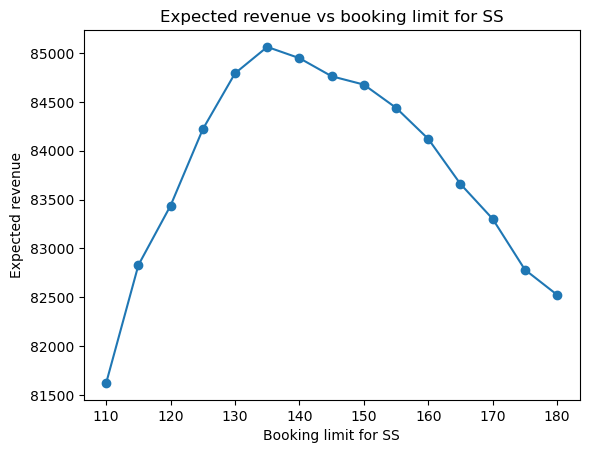

In [44]:
# create an array called q_grid with values from 110 to 180 in increments of 5
q_grid = np.arange(110, 185, 5)
avg_revenues = np.zeros(len(q_grid))

for i in range(len(q_grid)):
    avg_revenues[i] = run_sim(q_grid[i])[0]

plt.plot(q_grid, avg_revenues, marker='o')
plt.xlabel('Booking limit for SS')
plt.ylabel('Expected revenue')
plt.title('Expected revenue vs booking limit for SS')
plt.show()

In [45]:
qstar = q_grid[np.argmax(avg_revenues)]
print('Optimal booking limit for SS:', qstar)

Optimal booking limit for SS: 135


**Question 4** Overbooking